In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap, BoundaryNorm


# Heatmap

In [72]:
# Dropping unnecessary columns
def accuracy_per_labels(df_model, df_gold):
    # Ensure the text columns from both dataframes match
    assert all(df_model['text'] == df_gold['text'])

    label_data = []
    for label in df_model.columns:
        if label != 'text':
            wrong_preds = df_model[df_model[label] != df_gold[label]]
            wrong_labels = wrong_preds.apply(lambda x: ", ".join(x.index[x == 1].tolist()), axis=1)
            all_wrong_labels = wrong_labels.unique()

            correct_preds = sum(df_model[label] == df_gold[label])
            total_preds = len(df_model)
            accuracy = correct_preds / total_preds
            num_instances = df_gold[label].sum()

            wrong_label_str = ", ".join(all_wrong_labels)

            label_data.append([label, num_instances, accuracy, wrong_label_str])

    # Create a DataFrame and display it
    df_results = pd.DataFrame(label_data, columns=["Label Name", "Number of Instances", "Accuracy", "Wrongly Predicted Labels"])
    df_results = df_results.sort_values(by="Accuracy")
    return df_results


def create_heatmap(df_model, df_gold, color):
    all_labels = df_gold.columns[df_gold.columns != 'text'].tolist()

    df_gold[all_labels] = df_gold[all_labels].apply(pd.to_numeric, errors='coerce')
    df_model[all_labels] = df_model[all_labels].apply(pd.to_numeric, errors='coerce')

    # Fill any NaN values (resulting from string-to-numeric conversion) with a default value (e.g., 0)
    df_gold.fillna(0, inplace=True)
    df_model.fillna(0, inplace=True)

    # Generate the confusion matrix
    cm = confusion_matrix(df_gold[all_labels].idxmax(axis=1), df_model[all_labels].idxmax(axis=1), labels=all_labels)

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(15, 12))
    sns.heatmap(cm, annot=True, fmt="d", cmap=color, xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix Heatmap")
    plt.show()

In [73]:
def break_label(label):
    midpoint = len(label) // 2
    split_point = label.rfind(' ', 0, midpoint)
    if split_point == -1:
        return label  # Return the original label if no space is found
    return label[:split_point] + '\n' + label[split_point+1:]

def create_heatmap2(df_model, df_gold, color, file):
    all_labels = df_gold.columns[df_gold.columns != 'text'].tolist()

    df_gold[all_labels] = df_gold[all_labels].apply(pd.to_numeric, errors='coerce')
    df_model[all_labels] = df_model[all_labels].apply(pd.to_numeric, errors='coerce')

    # Fill any NaN values (resulting from string-to-numeric conversion) with a default value (e.g., 0)
    df_gold.fillna(0, inplace=True)
    df_model.fillna(0, inplace=True)

    # Generate the confusion matrix
    cm = confusion_matrix(df_gold[all_labels].idxmax(axis=1), df_model[all_labels].idxmax(axis=1), labels=all_labels)

    # Define custom boundaries and colors
    max_value = cm.max()
    boundaries = list(np.linspace(0, 1000, 9)) + list(np.linspace(1001, max_value, 9))
    colors = sns.color_palette(color, len(boundaries) - 1)

    cmap = ListedColormap(colors)
    norm = BoundaryNorm(boundaries, cmap.N, clip=True)

    # Create a heatmap for the confusion matrix with defined borders
    plt.figure(figsize=(15, 12))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, norm=norm, 
                     xticklabels=all_labels, yticklabels=all_labels, 
                     linewidth=0.5, linecolor='#002b5a')  # Adding borders here
    
    # Adjust the heatmap to ensure all borders are displayed
    ax.set_ylim(len(cm), 0)
    ax.set_xlim(0, len(cm))
    
    ax.tick_params(axis='x', colors='black', labelsize='large', labelrotation=90)
    ax.tick_params(axis='y', colors='black', labelsize='large', labelrotation=0)
    for label in ax.get_xticklabels():
        label.set_weight('bold')
    for label in ax.get_yticklabels():
        label.set_weight('bold')

        
#     ax.xaxis.tick_top()
#     ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.xaxis.set_label_position("top")

    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
#     plt.title("Confusion Matrix Heatmap")
    plt.savefig(file, dpi=600, bbox_inches='tight')
    plt.show()

In [74]:
# Loading the data
# df_model = pd.read_csv('new/final_preds_bn.csv', sep=',')
# df_gold = pd.read_csv('new/newdata_bn_test.csv', sep=',')

df_model = pd.read_csv('mfc/final_preds.csv', sep=',')
df_gold = pd.read_csv('mfc/gold_labels.csv', sep=',')

# df_model = pd.read_csv('new/final_preds_pt.csv', sep=',')
# df_gold = pd.read_csv('new/newdata_pt_test.csv', sep=',')


df_model = df_model.drop(columns=['language', 'None'])
df_gold = df_gold.drop(columns=['language', 'None'])

# df_gold.columns = [break_label(col) if col != 'text' else col for col in df_gold.columns]
# df_model.columns = [break_label(col) if col != 'text' else col for col in df_model.columns]
    
# accuracy_per_labels(df_model, df_gold)

In [75]:
# create_heatmap(df_model, df_gold, "PuBuGn")

In [76]:
# create_heatmap2(df_model, df_gold, 'Blues', 'heatmap_mfc3.pdf')

In [77]:
df = pd.read_csv('mfc_en_train.csv', sep=',')
label_counts = df.drop(columns=['text', 'language', 'None']).sum()
label_counts

Economic                                      474
Capacity and Resources                        114
Morality                                      471
Fairness and Equality                         312
Legality, Constitutionality, Jurisdiction    2154
Policy Prescription and Evaluation            590
Crime and Punishment                          766
Security and Defense                          189
Health and Safety                             225
Quality of Life                               525
Cultural Identity                             650
Public Sentiment                              706
Political                                    2068
External Regulation and Reputation            108
Other                                         387
dtype: int64

In [78]:
df = pd.read_csv('mfc_good_stu_en.csv', sep=',')
label_counts = df.drop(columns=['text', 'language', 'None']).sum()
label_counts

Economic                                      815
Capacity and Resources                        553
Morality                                      935
Fairness and Equality                         602
Legality, Constitutionality, Jurisdiction    2759
Policy Prescription and Evaluation           1046
Crime and Punishment                          954
Security and Defense                          366
Health and Safety                             642
Quality of Life                               775
Cultural Identity                             874
Public Sentiment                             1161
Political                                    2582
External Regulation and Reputation            344
Other                                         500
dtype: int64

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def abbreviate_labels(labels):
    # Abbreviate each label to its initials
    abbreviated = {label: ''.join(word[0] for word in label.split()) for label in labels}
    return abbreviated

def create_heatmap3(df_model, df_gold, color, file):
    all_labels = df_gold.columns[df_gold.columns != 'text'].tolist()
    abbreviated_labels = abbreviate_labels(all_labels)
    
    df_gold[all_labels] = df_gold[all_labels].apply(pd.to_numeric, errors='coerce')
    df_model[all_labels] = df_model[all_labels].apply(pd.to_numeric, errors='coerce')

    df_gold.fillna(0, inplace=True)
    df_model.fillna(0, inplace=True)

    cm = confusion_matrix(df_gold[all_labels].idxmax(axis=1), df_model[all_labels].idxmax(axis=1), labels=all_labels)

    max_value = cm.max()
    boundaries = list(np.linspace(0, 1000, 9)) + list(np.linspace(1001, max_value, 9))
    colors = sns.color_palette(color, len(boundaries) - 1)

    cmap = ListedColormap(colors)
    norm = BoundaryNorm(boundaries, cmap.N, clip=True)

    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, norm=norm, 
                xticklabels=[abbreviated_labels[label] for label in all_labels], 
                yticklabels=[abbreviated_labels[label] for label in all_labels], 
                linewidth=0.5, linecolor='#002b5a', ax=ax)

    ax.set_ylim(len(cm), 0)
    ax.set_xlim(0, len(cm))
    
    ax.tick_params(axis='x', colors='black', labelsize='large', labelrotation=90)
    ax.tick_params(axis='y', colors='black', labelsize='large', labelrotation=0)

    ax.yaxis.set_label_position("right")
    ax.xaxis.set_label_position("top")

    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    
    # Create a separate area for label names, top right and left-aligned
    label_text = "\n".join([f'{abbr}: {label}' for abbr, label in abbreviated_labels.items()])
    plt.figtext(1.05, 0.95, label_text, ha="left", va="top", fontsize=10, transform=plt.gcf().transFigure)

    plt.savefig(file, dpi=600, bbox_inches='tight')
    plt.show()

# Example usage
# df_gold = pd.read_csv('path_to_gold_data.csv')
# df_model = pd.read_csv('path_to_model_data.csv')
# create_heatmap3(df_model, df_gold, 'Blues', 'output_file.png')


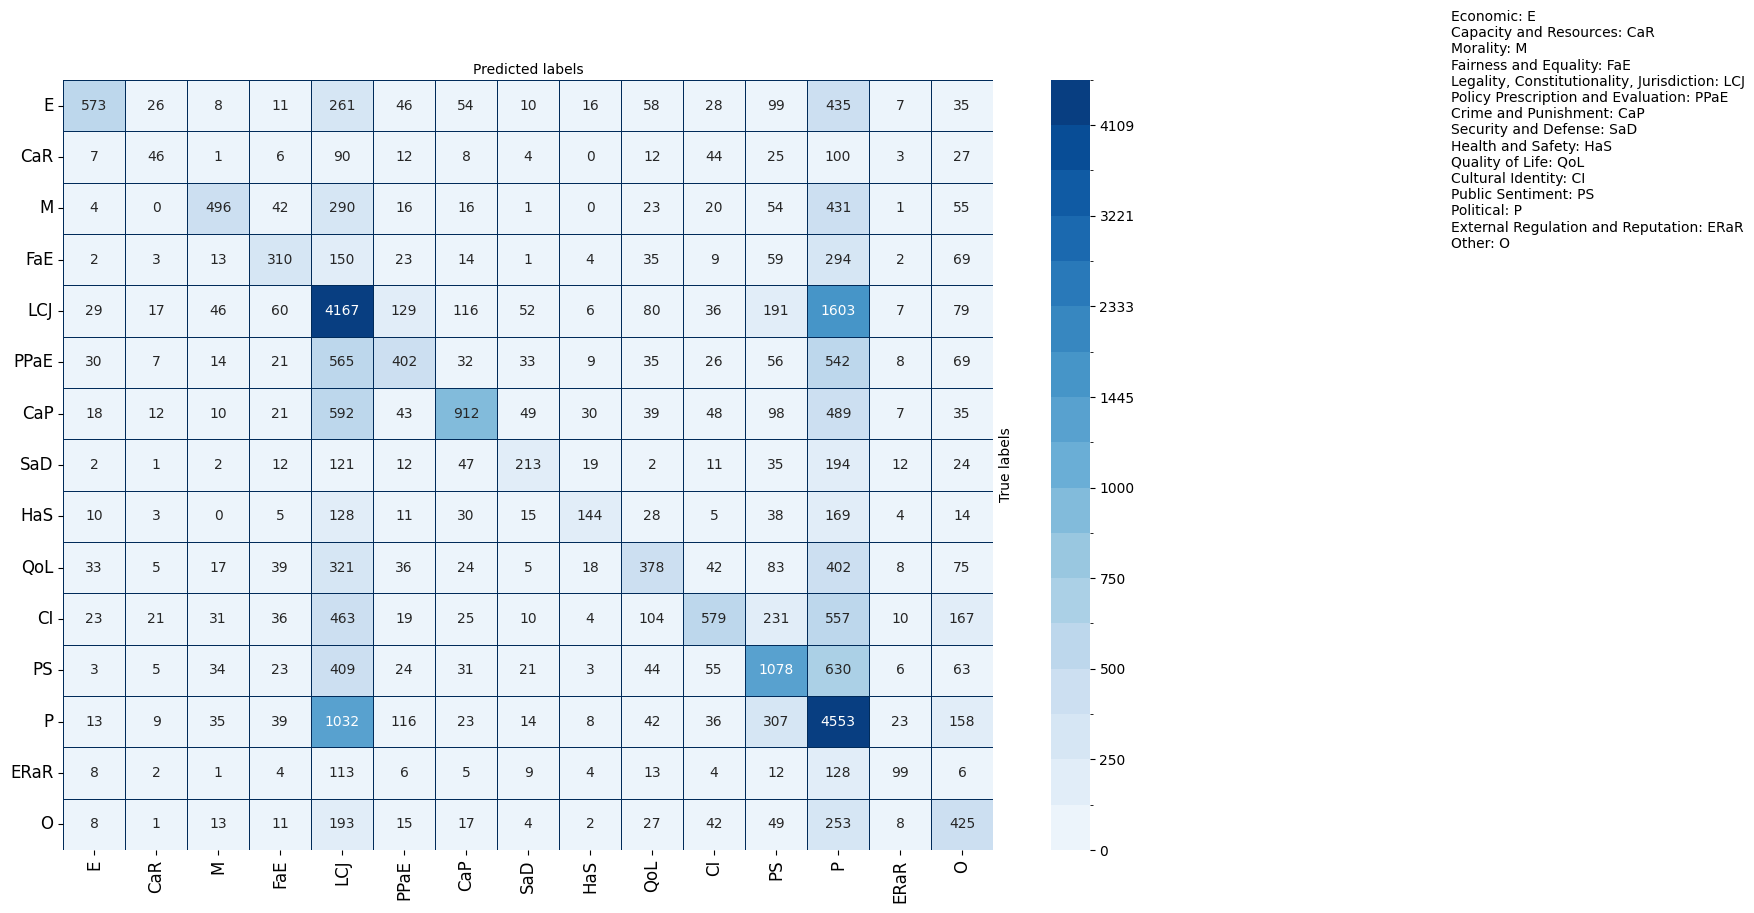

In [80]:
create_heatmap3(df_model, df_gold, 'Blues', 'heatmap_mfc4.pdf')

# multinomial AUC-PR

In [34]:
import pandas as pd
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

def multinomial_auc_pr(gold_labels_df, final_preds_df):
    average_precision_scores = []

    # Calculate average precision for each class
    for class_column in gold_labels_df.columns:
        y_true = gold_labels_df[class_column]
        y_scores = final_preds_df[class_column]
        average_precision = average_precision_score(y_true, y_scores)
        average_precision_scores.append(average_precision)

    # Calculate the mean average precision across all classes
    mean_average_precision = np.mean(average_precision_scores)
    print(f"Mean Average Precision-Recall (AUC-PR) across all classes: {mean_average_precision}")

In [41]:
gold_labels_df = pd.read_csv('mfc/gold_labels.csv')
final_preds_df = pd.read_csv('mfc/final_preds.csv')

gold_labels_df = gold_labels_df.drop(['text', 'language', 'None'], axis=1)
final_preds_df = final_preds_df.drop(['text', 'language', 'None'], axis=1)

multinomial_auc_pr(gold_labels_df, final_preds_df)

Mean Average Precision-Recall (AUC-PR) across all classes: 0.2087455776992126


In [47]:
gold_labels_df = pd.read_csv('new/newdata_bn_test.csv')
final_preds_df = pd.read_csv('new/final_preds_bn.csv')

final_preds_df = final_preds_df.rename(columns={'Capacity and Resources': 'language', 'language': 'Capacity and Resources'})

gold_labels_df = gold_labels_df.drop(['text', 'language', 'None'], axis=1).astype(int)
final_preds_df = final_preds_df.drop(['text', 'language', 'None'], axis=1).astype(int)

multinomial_auc_pr(gold_labels_df, final_preds_df)

Mean Average Precision-Recall (AUC-PR) across all classes: 0.07323562032193398


In [53]:
gold_labels_df = pd.read_csv('new/newdata_bn_test.csv')
final_preds_df = pd.read_csv('new/final_preds_bn.csv')

reordered_columns = [
    'text', 'language', 'Capacity and Resources', 'Crime and Punishment', 'Cultural Identity', 
    'Economic', 'External Regulation and Reputation', 'Fairness and Equality', 'Health and Safety',
    'Legality, Constitutionality, Jurisdiction', 'Morality', 'Other', 'Policy Prescription and Evaluation', 
    'Political', 'Public Sentiment', 'Quality of Life', 'Security and Defense', 'None'
]
final_preds_df.columns = reordered_columns
final_preds_df
gold_labels_df = gold_labels_df.drop(['text', 'language', 'None'], axis=1).astype(int)
final_preds_df = final_preds_df.drop(['text', 'language', 'None'], axis=1).astype(int)

multinomial_auc_pr(gold_labels_df, final_preds_df)

Mean Average Precision-Recall (AUC-PR) across all classes: 0.07212887259889084
